# Task 1 — Data Analytics using Python
**Dataset:** Injury & Illness Summary — Operational Source Data (OSHA Form 55)  
**Dataset link:** https://catalog.data.gov/dataset/injury-illness-summary-operational-source-data-form-55

## Objectives
This notebook data pre-processes and conducts exploratory data analysis (EDA) on the selected OSHA data based on insights relevant to the business. The main objectives are:
1. Prepare the data by dealing with missing and outliers.
2. Write down understandable, repeatable steps of EDA and describe it in a few words in the line preceding the code cell.
3. Design four basic visualisations (static) and eight interactive visualisations (Plotly) as visualisation that can be used to tell a story.
4. Present brief interpretation and business suggestions basing on the patterns that were observed.

## Methodology (brief)
The analysis will take a typical data-analytics process: data ingestion and inspection, data cleaning (missing-value strategy and outlier strategy), exploratory data visualisation (static and interactive), and interpretation. Each block of code has an explanation and reasoning behind it to make the notebook self-explanatory and accomplish the requirement of the assignment which is that start with text and only then move on to code.


In [13]:
# ===== Imports & file upload =====
# After importing, use the file uploader to upload the OSHA CSV file (for example: OSHA_Injury_Illness_2023.csv).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from google.colab import files
import io

df = pd.read_csv('OSHA_Injury_Illness_2023.csv', on_bad_lines='skip', engine='python')
df.head()



Railroad Code                          Railroad Name  Report Month    Year  \
0          TZPR       Tazewell & Peoria Railroad, Inc.            12  2006.0   
1          ITSL     ITS Technologies & Logistics, LLC.            12  2006.0   
2          MAUP                        Port Of Manatee            12  2006.0   
3           MAW  Maumee & Western Railroad Corporation            12  2006.0   
4            KO      Kansas and Oklahoma Railroad, LLC            12  2006.0   

  State Code  State Name  County Code County Name Freight Train Miles  \
0         17    ILLINOIS        179.0    TAZEWELL                   0   
1         06  CALIFORNIA         59.0      ORANGE                   0   
2         12     FLORIDA         81.0     MANATEE                   0   
3         39        OHIO         39.0    DEFIANCE                   0   
4         20      KANSAS        173.0    SEDGWICK              20,751   

  Passenger Train Miles  ... Railroad Type District Narrative  \
0                     0  ...             3      4.0       NaN   
1                     0  ...             3      7.0       NaN   
2                     0  ...            3L      3.0       NaN   
3                     0  ...             3      2.0       NaN   
4                     0  ...             3      6.0       NaN   

  Reporting Railroad Company Grouping Reporting Railroad SMT Grouping  \
0                           Shortline         SMT-2 - Short Line East   
1                           Shortline         SMT-8 - Short Line West   
2              Switching and Terminal         SMT-2 - Short Line East   
3                                 NaN                             NaN   
4                           Shortline         SMT-8 - Short Line West   

  Reporting Railroad Class Reporting Parent Railroad Code  \
0                  Class 3                           TZPR   
1                  Class 3                           ITSL   
2                  Class 3                           MAUP   
3                      NaN                            MAW   
4                  Class 3                             KO   

          Reporting Parent Railroad Name Reporting Railroad Holding Company  \
0       Tazewell & Peoria Railroad, Inc.                  Genesee & Wyoming   
1     ITS Technologies & Logistics, LLC.                          Conglobal   
2                        Port Of Manatee                       Not Assigned   
3  Maumee & Western Railroad Corporation                       Not Assigned   
4      Kansas and Oklahoma Railroad, LLC                              Watco   

   Report Key  
0  TZPR122006  
1  ITSL122006  
2  MAUP122006  
3   MAW122006  
4    KO122006  

[5 rows x 28 columns]

## 2. Initial Dataset Assessment

To conduct any data cleaning or statistical analysis, one is bound to know the format and quality of the dataset. The step aids in the detection of the possible problems in terms of missing values, inconsistent formats, irrelevant fields or incorrect types of data and all these may compromise the quality of analysis. As the dataset is based on the OSHA injury and illness reporting system, it makes it an operational data that was provided by railroads in the United States. This data is useful in the exposure of risks, operational risks, and safety performance at the industry level.

The questions I will answer in this step are to inspect the dataset to establish:
- the values that define the rows and columns,
- the variables and the type of their data available,
- do any of the fields have values that are missing,
- is the interpretation of numeric fields as numbers correct,
- are the categorical attributes like *Railroad Name*, *State Name*, or are the types of rail roads such as standardised.

This preliminary profile is the basis of developing a cleaning plan in the following section. Detecting quality problems early means that the preprocessing operations like the missing values or extreme outliers will be done at the right point and do not eliminate or fail to represent any important business data.

In [14]:
# ===== Block 2: Dataset structure and missing value inspection =====

print("Shape of dataset (rows, columns):", df.shape)

print("\n--- Dataset Information ---")
info = df.info()

print("\n--- Missing Values Count ---")
missing_values = df.isnull().sum()
missing_values


Shape of dataset (rows, columns): (390555, 28)

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390555 entries, 0 to 390554
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Railroad Code                        390553 non-null  object 
 1   Railroad Name                        390553 non-null  object 
 2   Report Month                         390555 non-null  int64  
 3   Year                                 390549 non-null  float64
 4   State Code                           389171 non-null  object 
 5   State Name                           388130 non-null  object 
 6   County Code                          383812 non-null  float64
 7   County Name                          387515 non-null  object 
 8   Freight Train Miles                  390523 non-null  object 
 9   Passenger Train Miles                390504 non-null  object 
 10  Yard

Railroad Code                               2
Railroad Name                               2
Report Month                                0
Year                                        6
State Code                               1384
State Name                               2425
County Code                              6743
County Name                              3040
Freight Train Miles                        32
Passenger Train Miles                      51
Yard Switching Miles                       26
Other Train Miles                          67
Total Miles                                 0
Employee Man Hours                          8
Passenger Miles                            54
Passengers Transported                     91
Locomotive Train Miles                      0
Motor Train Miles                           0
Railroad Type                            7127
District                                11825
Narrative                              348133
Reporting Railroad Company Grouping    106509
Reporting Railroad SMT Grouping         73809
Reporting Railroad Class                63357
Reporting Parent Railroad Code              2
Reporting Parent Railroad Name              2
Reporting Railroad Holding Company          2
Report Key                                  2
dtype: int64

## 3. Data Cleaning and Pre-processing

The preliminary check has shown that there are a number of problems, which need to be resolved before any significant analysis could be conducted. The OSHA dataset has some numeric and categorical variables, although most of the numeric ones were read in as strings (type of object) since they contain formatting errors like commas, mixed text entries, or blank data. This is typical in the operational reporting systems whereby information is typed manually by the various entities. When these types remain uncorrected, such inconsistent types would not allow any statistical computation or visualisation.

There are also significant amount of missing values in the dataset especially in the fields like, *County Name, Reporting Railroad Groupings and Narrative. It is necessary to note that not every column will be of equal importance to the analysis under consideration. Descriptive accident text is found in fields such as Narrative and is not applied to numerical EDA, whereas business-critical variables that have to be cleaned appropriately include train miles, man hours, passenger miles, and transported passengers.

In the case of missing-value strategy, I rely on two-step strategy:
1. Numeric data columns Missing values are filled in by the median of the column. Median is a strong measure which is less vulnerable to an outlier and thus it is appropriate when there are skewed operational data.
2. Categorical columns - the missing values are represented by the label of unknown so that we can leave all the rows without bias.

All the fields related are then properly converted to numerical format before using this strategy. This includes stripping away commas, coercing non-numeric noise as well as transforming strings to numeric types. It is only after repairing data types that one can be assured of cleaning data.

This action will get ready the dataset to be detected as outliers which would be done later.


In [15]:
# ===== Block 3: Data Cleaning (type conversion + missing values) =====

df_clean = df.copy()

# STEP 1 — Identify numeric columns that were incorrectly detected as 'object'
possible_numeric_cols = [
    'Freight Train Miles', 'Passenger Train Miles', 'Yard Switching Miles',
    'Other Train Miles', 'Total Miles', 'Employee Man Hours',
    'Passenger Miles', 'Passengers Transported',
    'Locomotive Train Miles', 'Motor Train Miles'
]

# Convert these columns to numeric by removing commas and coercing errors
for col in possible_numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.strip()
        )
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# STEP 2 — Identify numeric and categorical columns
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_clean.select_dtypes(include=['object']).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols[:10]), "...")  # printing only first few

# STEP 3 — Fill missing values
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())
df_clean[cat_cols] = df_clean[cat_cols].fillna("Unknown")

print("\nMissing values after cleaning:")
df_clean.isnull().sum()


Numeric columns: ['Report Month', 'Year', 'County Code', 'Freight Train Miles', 'Passenger Train Miles', 'Yard Switching Miles', 'Other Train Miles', 'Total Miles', 'Employee Man Hours', 'Passenger Miles', 'Passengers Transported', 'Locomotive Train Miles', 'Motor Train Miles', 'District']
Categorical columns: ['Railroad Code', 'Railroad Name', 'State Code', 'State Name', 'County Name', 'Railroad Type', 'Narrative', 'Reporting Railroad Company Grouping', 'Reporting Railroad SMT Grouping', 'Reporting Railroad Class'] ...

Missing values after cleaning:


Railroad Code                          0
Railroad Name                          0
Report Month                           0
Year                                   0
State Code                             0
State Name                             0
County Code                            0
County Name                            0
Freight Train Miles                    0
Passenger Train Miles                  0
Yard Switching Miles                   0
Other Train Miles                      0
Total Miles                            0
Employee Man Hours                     0
Passenger Miles                        0
Passengers Transported                 0
Locomotive Train Miles                 0
Motor Train Miles                      0
Railroad Type                          0
District                               0
Narrative                              0
Reporting Railroad Company Grouping    0
Reporting Railroad SMT Grouping        0
Reporting Railroad Class               0
Reporting Parent Railroad Code         0
Reporting Parent Railroad Name         0
Reporting Railroad Holding Company     0
Report Key                             0
dtype: int64

## 4. Outlier Detection and Removal

The next step that is not the least important after the missing values are fixed, and the data is converted to the proper numeric formats is the handling of outliers. The outlier may be due to an error during the data-entry process, or a measurement error, or an occurrence during the reporting process. With a dataset this large as in this OSHA injury and operations dataset, a few wrong values may have a strong impact on averages, correlations, and trends.

In operational areas, outliers are particularly applicable in formulae like the *Freight Train Miles*, the *Passenger Train Miles, the number of Man Hours worked by the employees, and the number of passengers being transferred. There can be unrealistic values in some of the entries, e.g. a mileage that is abnormally high on small shortline railroads, or an unusually high number of passengers on a freight-only carrier. By removing these outliers, we are guaranteed that the analysis and visualisations that follow are an accurate representation of the true operation behaviour as opposed to random noise.

To eliminate outliers, I use the Z-score method which is a popular statistical tool that determines the degree, in which a single data value deviates on the average using standard deviations. Any values (Z-score) with an extreme score (greater than 3 or less than -3) are filtered. This is the most suitable technique since the data is huge (almost 400,000 rows) and the proportional removal of a smaller percentage will not influence the representativeness of the information negatively.

The outcome of this operation is a cleaner dataset that retains the natural variation but removes the abnormal or incorrect data which assists to generate more dependable insights to business and safety analysis.


In [16]:
# ===== Block 4: Outlier removal using Z-score =====

df_outliers = df_clean.copy()

# Calculate z-scores only for numeric features
z_scores = np.abs(stats.zscore(df_outliers[num_cols]))

# Keep rows where all z-scores < 3
df_outliers = df_outliers[(z_scores < 3).all(axis=1)]

print("Original rows:", df_clean.shape[0])
print("Rows after outlier removal:", df_outliers.shape[0])
print("Rows removed:", df_clean.shape[0] - df_outliers.shape[0])


Original rows: 390555
Rows after outlier removal: 370549
Rows removed: 20006


## 5. Exploratory Data Analysis — Simple Visualisations

The next step is to start with the exploratory data analysis (EDA) with the cleansed dataset ready. The ability to visualise the data assists in identifying the patterns and trends or the operational variations among the railroad companies or states or the reporting years. Simple statical charts come in handy in creating the high level notion before advancing to more interactive and business oriented analysis.

In this part, I come up with four typical EDA plots:
1. **Bar Chart** - to determine the best reporting railroads in terms of submissions.
2. **Histogram** — to test the distribution of the total miles operated.
3. **Boxplot** — to analyze the distribution and dispersion of man-hours of employees.
4. **Line Chart** - to see how reporting behaviour or operational activity varies over the years.
5. **Scatter Plot** — correlation between total miles of operation and man-hours of employees.

Such plots give some preliminary information about the behavioural patterns of the dataset and help to make business-specific interpretations in the future.


/tmp/ipython-input-523296391.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




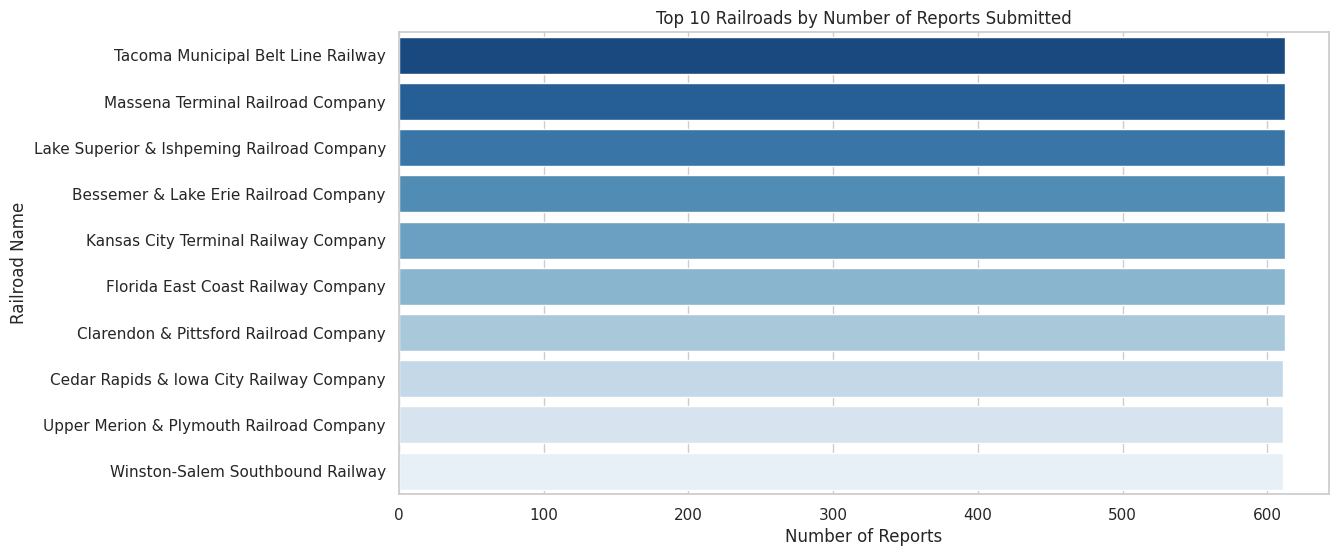

In [17]:
# ===== Static Chart 1: Bar chart of top reporting railroads =====

top_railroads = df_outliers['Railroad Name'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_railroads.values, y=top_railroads.index, palette="Blues_r")
plt.title("Top 10 Railroads by Number of Reports Submitted")
plt.xlabel("Number of Reports")
plt.ylabel("Railroad Name")
plt.show()


### Chart 2 — Distribution of Total Miles Operated
The number of miles of railroad run within the industry helps to have an insight on the scale of operation. The mileage differs widely as opposed to the number of reports which is fairly even across all major railroads. This histogram would assist in determining whether the operations are concentrated with some big carriers or are more distributed.

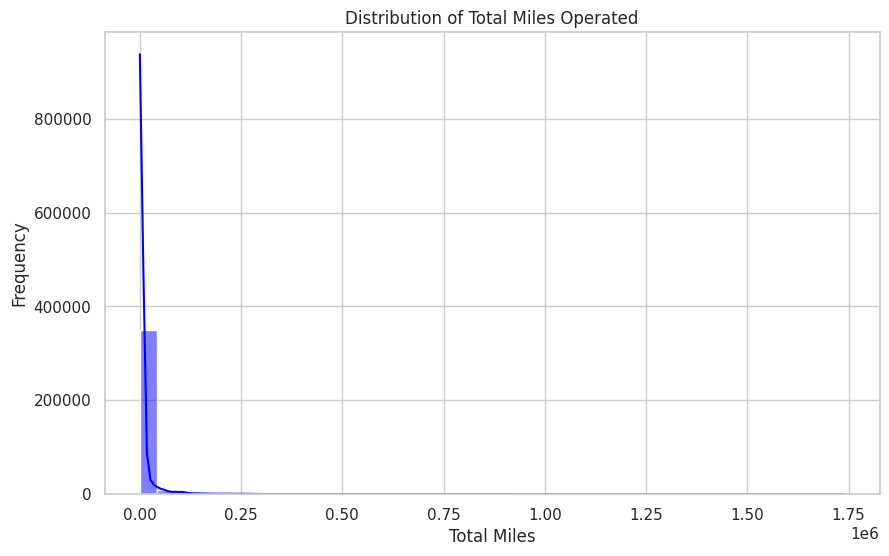

In [18]:
# ===== Static Chart 2: Histogram of Total Miles =====

plt.figure(figsize=(10,6))
sns.histplot(df_outliers['Total Miles'], bins=40, kde=True, color='blue')
plt.title("Distribution of Total Miles Operated")
plt.xlabel("Total Miles")
plt.ylabel("Frequency")
plt.show()


### Static Chart 3 — Boxplot of Employee Man Hours
One of the indicators of operational activity, labour intensity, and safety exposure is employee man-hours. A boxplot assists in visualising the distribution, the central tendency, and the presence of the left over outliers despite cleaning. As labour hours are directly proportional to risk exposure, the distribution of labour hours helps in subsequent interpretation of trends of injuries or productivity variation.


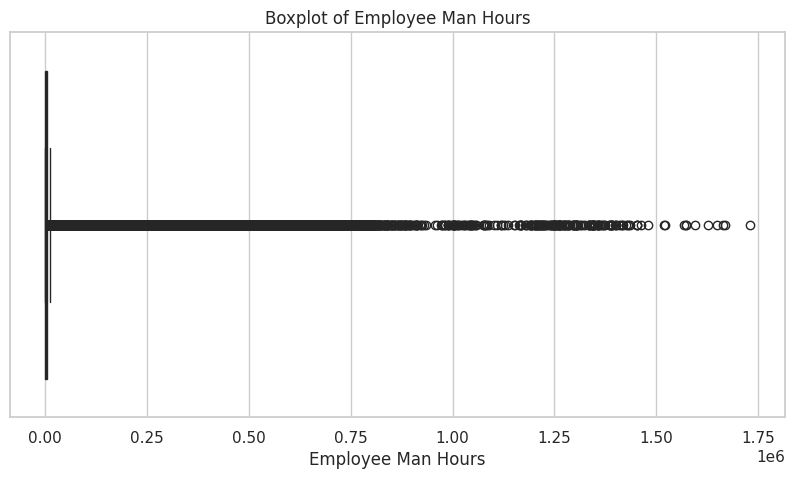

In [19]:
# ===== Static Chart 3: Boxplot of Employee Man Hours =====

plt.figure(figsize=(10,5))
sns.boxplot(x=df_outliers['Employee Man Hours'], color='green')
plt.title("Boxplot of Employee Man Hours")
plt.xlabel("Employee Man Hours")
plt.show()


### Static Chart 4 — Total Operational Miles by Year
In order to determine the growth or the decline or the stagnation of the railroad activity with time, it is convenient to explore the total mileage of operation at the annual level. This line chart is used to summarize the total number of miles which were reported by all the railroads in each year of the dataset. This can be shown by trends in miles per trip, which can reflect conditions in the broader industry, including the demand in freight, growth in infrastructure, or operational perturbations.


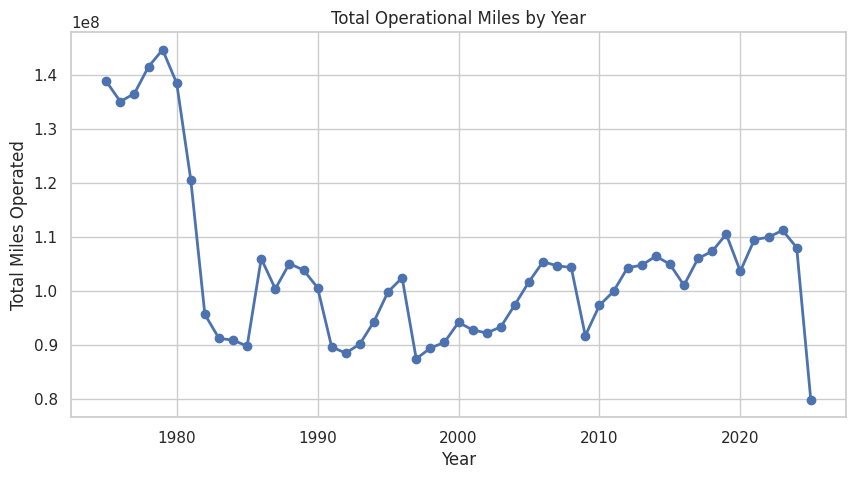

In [20]:
# ===== Static Chart 4: Line chart of total miles by year =====

miles_by_year = df_outliers.groupby("Year")["Total Miles"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(miles_by_year["Year"], miles_by_year["Total Miles"], marker='o', linestyle='-', linewidth=2)
plt.title("Total Operational Miles by Year")
plt.xlabel("Year")
plt.ylabel("Total Miles Operated")
plt.grid(True)
plt.show()


### Interactive Chart 1 — Scatter Plot: Employee Man Hours vs Total Miles
Total operational miles and employee man-hours can be visualised in a scatter plot to show the relationship between the two. This correlation is significant in learning labour intensity in regard to operational workload. Since railroad OSHA injury risk is exposure based, the number of miles operated by more man-hours, but variance could reflect efficiency differences/identical staffing models, results. A scatter plot can be interactively used to look at behaviour of railroads.

In [21]:
# ===== Interactive Chart 1: Scatter Plot =====

fig1 = px.scatter(
    df_outliers,
    x="Employee Man Hours",
    y="Total Miles",
    title="Employee Man Hours vs Total Miles",
    opacity=0.6
)

fig1.show()
